import numpy as np
import matplotlib.pyplot as plt

# Define parameters
frequency1 = 300e6  # Frequency of the cosine signal (in Hz)
amplitude = 1  # Amplitude of the cosine signal
phase = 0      # Phase of the cosine signal
frequency2 = 800e6
sampling_frequency = 500e6  # Sampling frequency (in Hz)
duration = 2   # Duration of the signal (in seconds)

# Generate time vector
t = np.arange(0, duration, 1/sampling_frequency)

# Generate cosine signal
cosine_signal_1 = amplitude * np.cos(2 * np.pi * frequency1 * t + phase)
cosine_signal_2 = amplitude * np.cos(2 * np.pi * frequency2 * t + phase)


# Plot the continuous cosine signal
plt.figure(figsize=(10, 4))
plt.plot(t, cosine_signal_1, label='Continuous Cosine Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Continuous Cosine Signal_1')
plt.grid(True)
plt.legend()
plt.show()

# Sample the cosine signal
sampled_cosine_signal_1 = amplitude * np.cos(2 * np.pi * frequency1 * t[:sampling_frequency*duration:sampling_frequency] + phase)

# Plot the sampled cosine signal
plt.figure(figsize=(10, 4))
plt.stem(t[:sampling_frequency*duration:sampling_frequency], sampled_cosine_signal_1, markerfmt='ro', linefmt='r-', basefmt='k-')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sampled Cosine Signal_1')
plt.grid(True)
plt.show()


MSE for nrml 1.0021822628821573
MSE for  ts/2 shifted 1.0001272880409418


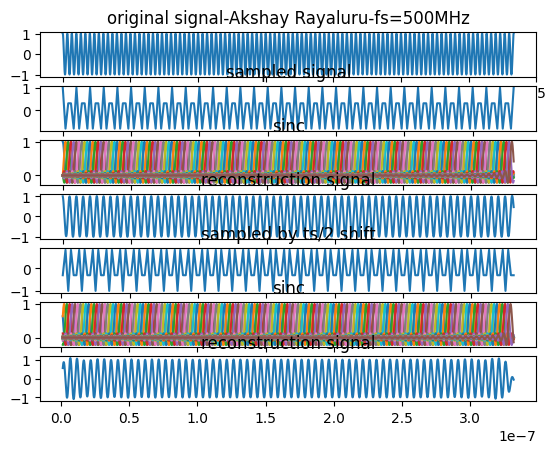

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

sampling_frequency = 500e6
frequency1 = 300e6
T=10/frequency1
t_samp=1/sampling_frequency
fig,(a1,a2,a3,a4,a5,a6,a7)=plt.subplots(7)


t=np.linspace(0,10*T,10000)
x=np.cos(2*np.pi*frequency1*t)

ts=np.arange(0,(10*T)-t_samp,t_samp)
len_s=len(ts)
xs=np.cos(2*np.pi*frequency1*ts)

tsinc=np.linspace(0,(10*T)-t_samp,10000)
xsinc=np.zeros(len(tsinc))
xrecon=np.zeros(len(tsinc))

for i in range(0,len(ts)):
  xsinc=np.sinc((tsinc-(i*t_samp))/t_samp)
  xrecon=xrecon+(xs[i]*xsinc)
  a3.plot(tsinc,xsinc)
  a3.set_title('sinc')


ts1=np.arange(t_samp/2,(10*T)-(t_samp/2),t_samp)
len_s1=len(ts1)
xs1=np.cos(2*np.pi*frequency1*ts1)

tsinc1=np.linspace(t_samp/2,(10*T)-(t_samp/2),10000)
xsinc1=np.zeros(len(tsinc1))
xrecon1=np.zeros(len(tsinc1))

for i in range(0,len(ts1)):
  xsinc1=np.sinc((tsinc1-(i*t_samp))/t_samp)
  xrecon1=xrecon1+(xs1[i]*xsinc1)
  a6.plot(tsinc1,xsinc1)
  a6.set_title('sinc')


a1.plot(t,x)
a1.set_title('original signal-Akshay Rayaluru-fs=500MHz')

a2.plot(ts,xs)
a2.set_title('sampled signal')

a4.plot(tsinc,xrecon)
a4.set_title('reconstruction signal')

a5.plot(ts1,xs1)
a5.set_title('sampled by ts/2 shift')

a7.plot(tsinc1,xrecon1)
a7.set_title('reconstruction signal')
mse=mean_squared_error(xrecon,x)
mse_shifted=mean_squared_error(xrecon1,x)
print('MSE for nrml',mse)
print('MSE for  ts/2 shifted',mse_shifted)
for i in range(0,len(ts1)):
  xsinc1=np.sinc((tsinc1-(i*t_samp))/t_samp)
  xrecon1=xrecon1 +(xs1[i]*xsinc1)



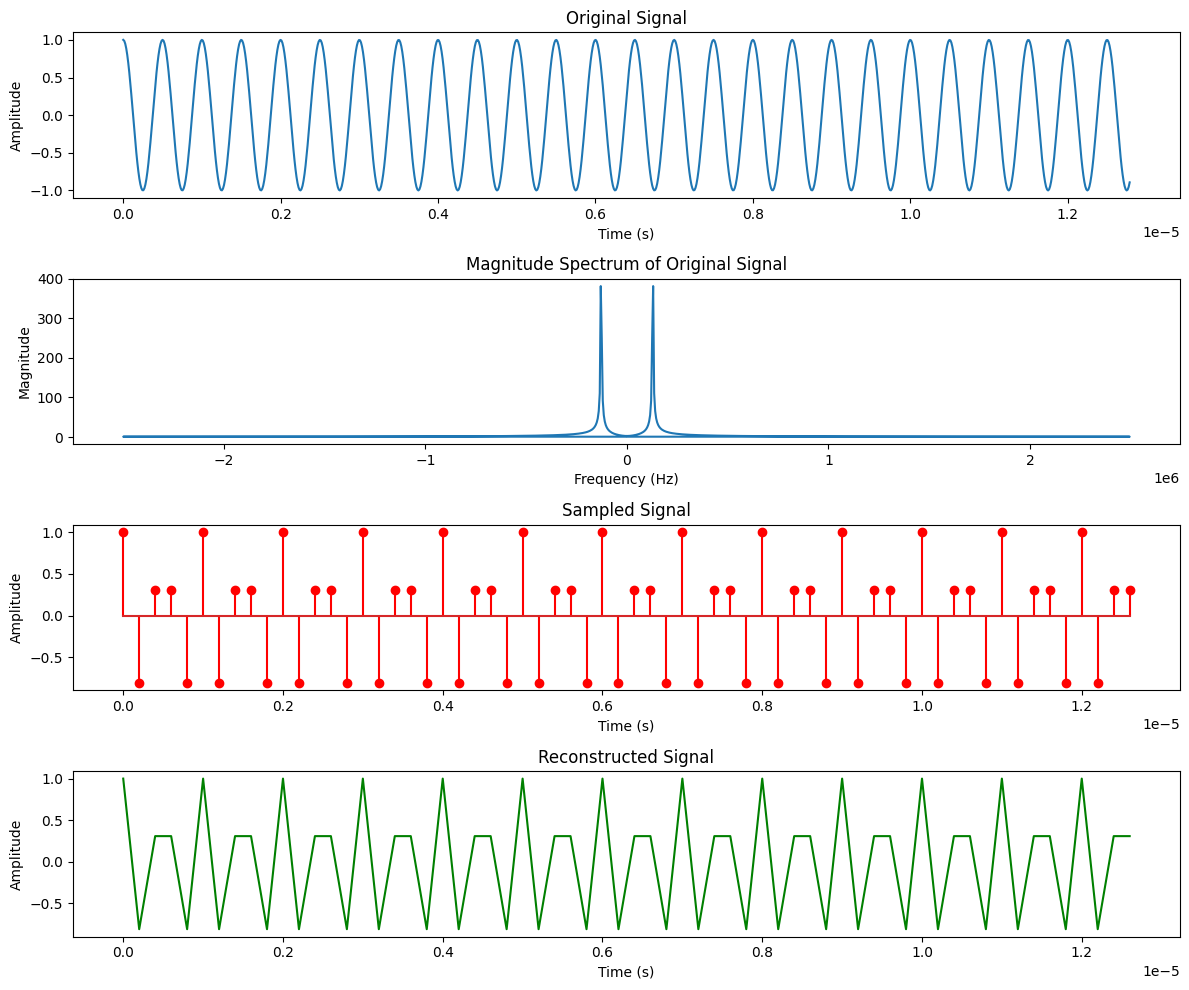

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# Define signal parameters
F = 2e6  # Frequency of the signal in Hz
Fs = 5e6  # Sampling frequency in Hz
duration = 64 / Fs  # Duration of the signal in seconds

# Generate time vector for original signal
t_orig = np.linspace(0, duration, 1000, endpoint=False)

# Generate the original signal
x_orig = np.cos(2 * np.pi * F * t_orig)

# Generate time vector for sampled signal
t_sampled = np.linspace(0, duration, 64, endpoint=False)

# Generate the sampled signal
x_sampled = np.cos(2 * np.pi * F * t_sampled)

# Compute the DFT of the original signal
X_orig = fft(x_orig)

# Create frequency axis for DFT
freq_orig = np.fft.fftfreq(len(x_orig), 1/Fs)

# Compute the DFT of the sampled signal
X_sampled = fft(x_sampled)

# Reconstruct the signal from the sampled signal's DFT
x_reconstructed = ifft(X_sampled)

# Plot the original signal, its DFT, the sampled signal, and the reconstructed signal
plt.figure(figsize=(12, 10))

# Plot the original signal
plt.subplot(4, 1, 1)
plt.plot(t_orig, x_orig)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the DFT of the original signal
plt.subplot(4, 1, 2)
plt.plot(freq_orig, np.abs(X_orig))
plt.title('Magnitude Spectrum of Original Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

# Plot the sampled signal
plt.subplot(4, 1, 3)
plt.stem(t_sampled, x_sampled, 'r')
plt.title('Sampled Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the reconstructed signal
plt.subplot(4, 1, 4)
plt.plot(t_sampled, x_reconstructed.real, 'g')
plt.title('Reconstructed Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


<ipython-input-46-45f154e1f77b>:18: DeprecationWarning: Importing blackman from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.blackman' or the convenience function 'scipy.signal.get_window' instead.
  window = blackman(len(x_orig))


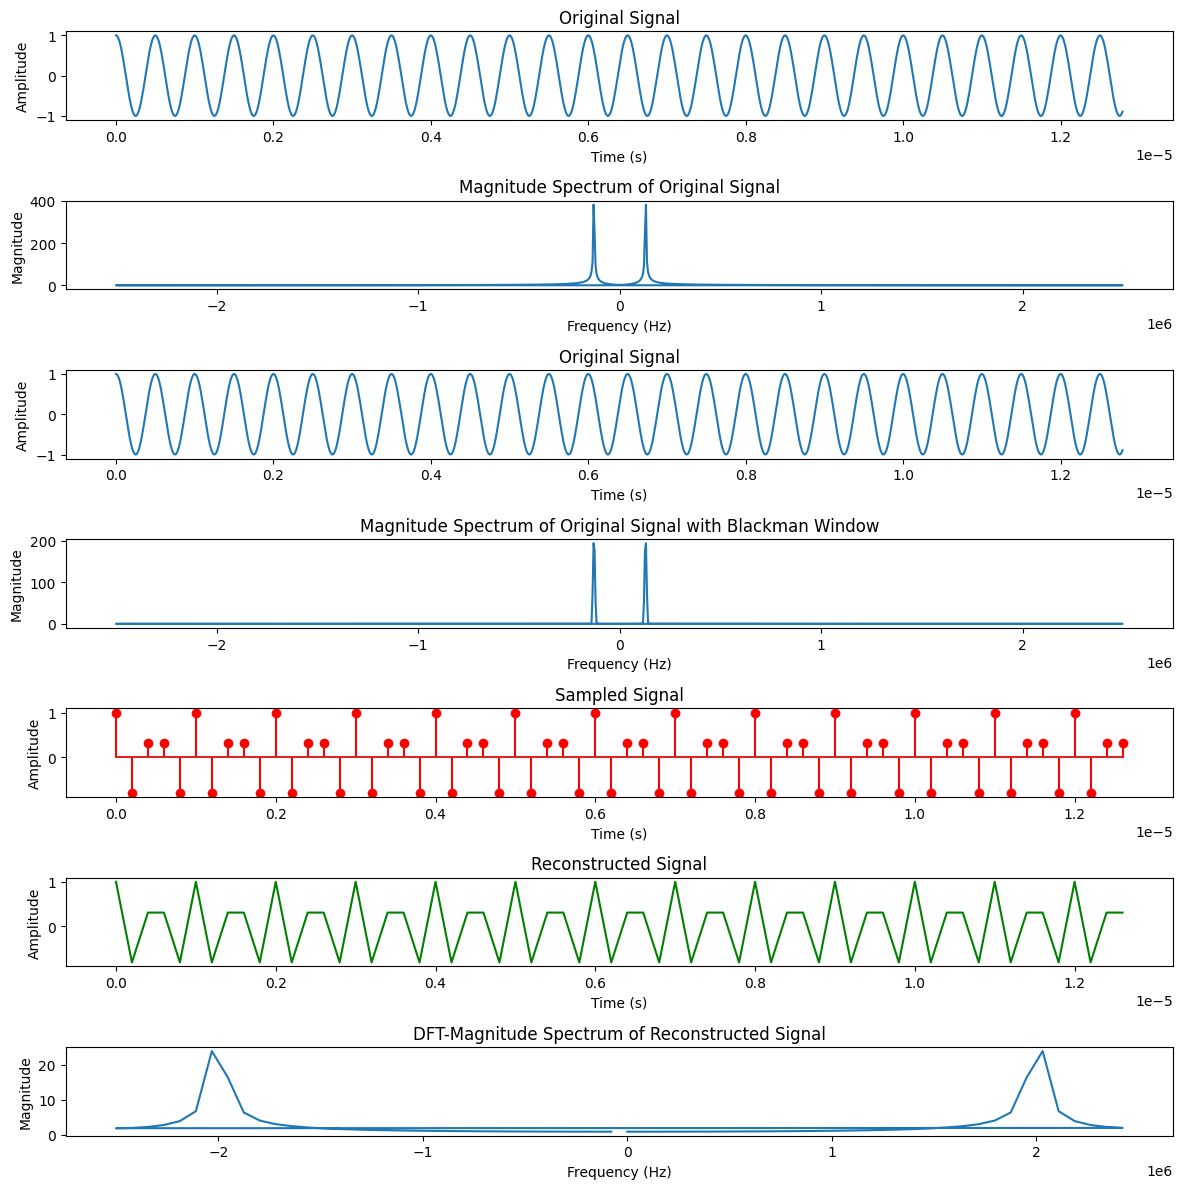

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft
from scipy.signal import blackman

# Define signal parameters
F = 2e6  # Frequency of the signal in Hz
Fs = 5e6  # Sampling frequency in Hz
duration = 64 / Fs  # Duration of the signal in seconds

# Generate time vector for original signal
t_orig = np.linspace(0, duration, 1000, endpoint=False)

# Generate the original signal
x_orig = np.cos(2 * np.pi * F * t_orig)

# Apply Blackman window to the original signal
window = blackman(len(x_orig))
x_orig_windowed = x_orig * window

# Compute the DFT of the original signal with Blackman window
X_orig_windowed = fft(x_orig_windowed)

# Create frequency axis for DFT
freq_orig = fftfreq(len(x_orig), 1/Fs)

# Generate time vector for sampled signal
t_sampled = np.linspace(0, duration, 64, endpoint=False)

# Generate the sampled signal
x_sampled = np.cos(2 * np.pi * F * t_sampled)

# Compute the DFT of the sampled signal
X_sampled = fft(x_sampled)

# Reconstruct the signal from the sampled signal's DFT
x_reconstructed = ifft(X_sampled)
# Compute the DFT of the reconstructed signal
X_reconstructed = fft(x_reconstructed)
# Plot the original signal with Blackman window, its DFT, the sampled signal, and the reconstructed signal
plt.figure(figsize=(12, 12))

# Plot the original signal
plt.subplot(7, 1, 1)
plt.plot(t_orig, x_orig)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the DFT of the original signal
plt.subplot(7, 1, 2)
plt.plot(freq_orig, np.abs(X_orig))
plt.title('Magnitude Spectrum of Original Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')# Plot the original signal
plt.subplot(7, 1, 3)
plt.plot(t_orig, x_orig)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')



# Plot the DFT of the original signal with Blackman window
plt.subplot(7, 1, 4)
plt.plot(freq_orig, np.abs(X_orig_windowed))
plt.title('Magnitude Spectrum of Original Signal with Blackman Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

# Plot the sampled signal
plt.subplot(7, 1, 5)
plt.stem(t_sampled, x_sampled, 'r')
plt.title('Sampled Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the reconstructed signal
plt.subplot(7, 1, 6)
plt.plot(t_sampled, x_reconstructed.real, 'g')
plt.title('Reconstructed Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the DFT of the reconstructed signal
plt.subplot(7, 1, 7)
freq_reconstructed = np.fft.fftfreq(len(x_reconstructed), 1/Fs)
plt.plot(freq_reconstructed, np.abs(X_reconstructed))
plt.title('DFT-Magnitude Spectrum of Reconstructed Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()


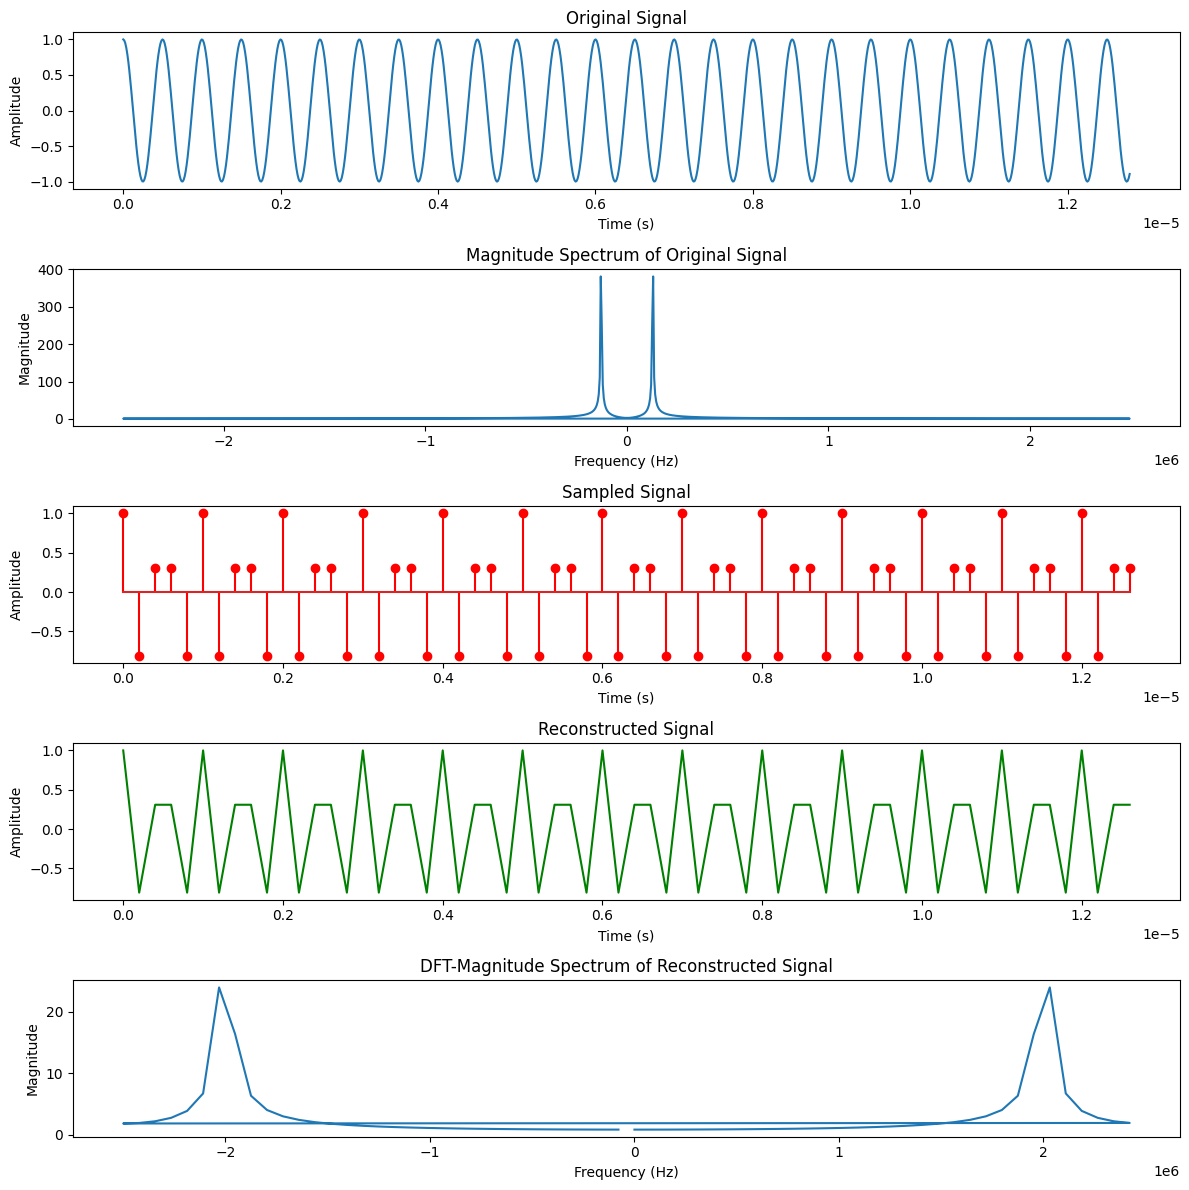

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# Define signal parameters
F = 2e6  # Frequency of the signal in Hz
Fs = 5e6  # Sampling frequency in Hz
duration = 64 / Fs  # Duration of the signal in seconds

# Generate time vector for original signal
t_orig = np.linspace(0, duration, 1000, endpoint=False)

# Generate the original signal
x_orig = np.cos(2 * np.pi * F * t_orig)

# Generate time vector for sampled signal
t_sampled = np.linspace(0, duration, 64, endpoint=False)

# Generate the sampled signal
x_sampled = np.cos(2 * np.pi * F * t_sampled)

# Compute the DFT of the original signal
X_orig = fft(x_orig)

# Create frequency axis for DFT
freq_orig = np.fft.fftfreq(len(x_orig), 1/Fs)

# Compute the DFT of the sampled signal
X_sampled = fft(x_sampled)

# Reconstruct the signal from the sampled signal's DFT
x_reconstructed = ifft(X_sampled)


# Compute the DFT of the reconstructed signal
X_reconstructed = fft(x_reconstructed)

# Plot the original signal, its DFT, the sampled signal, the reconstructed signal, and its DFT
plt.figure(figsize=(12, 12))

# Plot the original signal
plt.subplot(5, 1, 1)
plt.plot(t_orig, x_orig)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the DFT of the original signal
plt.subplot(5, 1, 2)
plt.plot(freq_orig, np.abs(X_orig))
plt.title('Magnitude Spectrum of Original Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

# Plot the sampled signal
plt.subplot(5, 1, 3)
plt.stem(t_sampled, x_sampled, 'r')
plt.title('Sampled Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the reconstructed signal
plt.subplot(5, 1, 4)
plt.plot(t_sampled, x_reconstructed.real, 'g')
plt.title('Reconstructed Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


# Plot the DFT of the reconstructed signal
plt.subplot(5, 1, 5)
freq_reconstructed = np.fft.fftfreq(len(x_reconstructed), 1/Fs)
plt.plot(freq_reconstructed, np.abs(X_reconstructed))
plt.title('DFT-Magnitude Spectrum of Reconstructed Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()


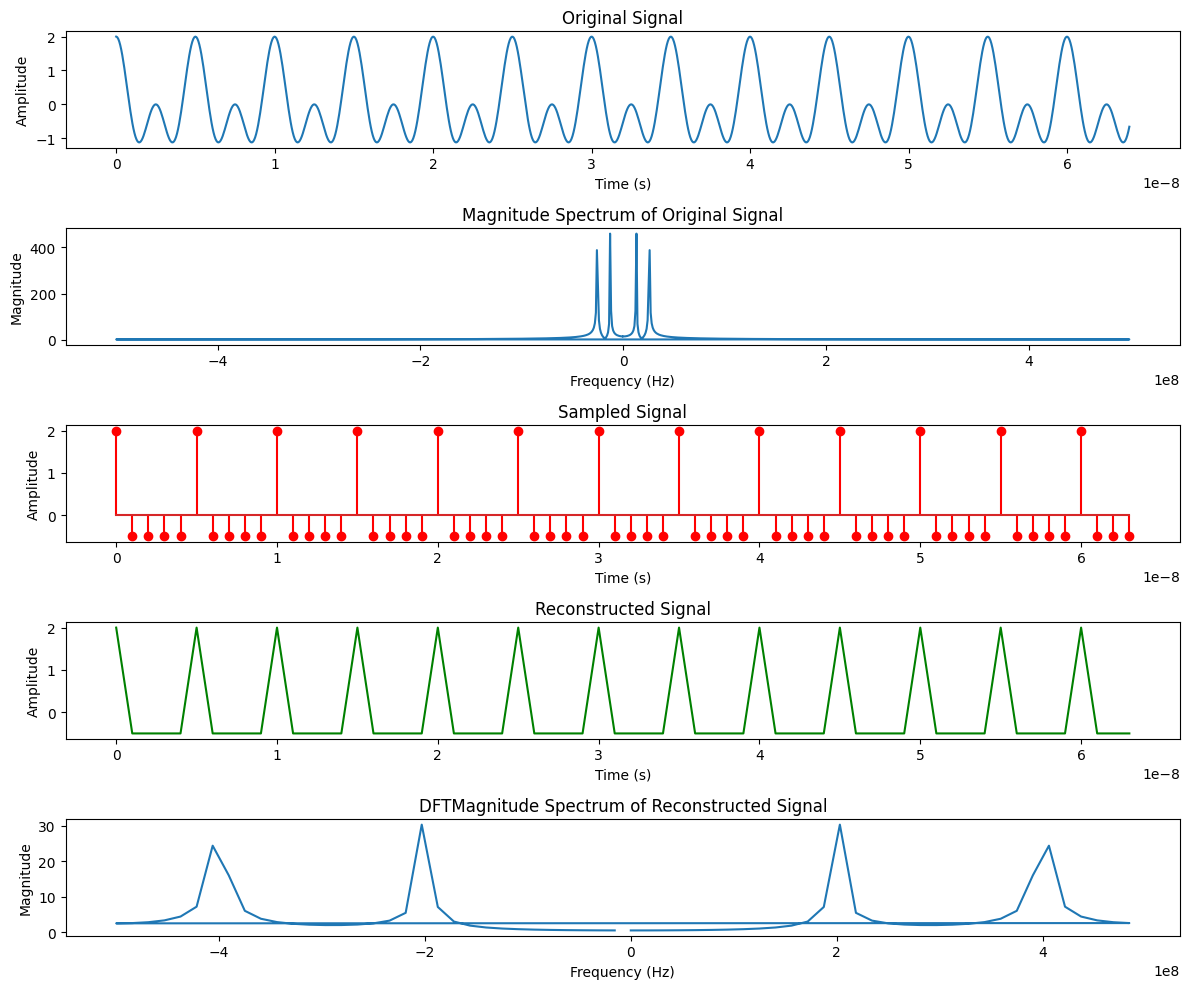

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# Define signal parameters
F1 = 200e6  # Frequency of the first component of the signal in Hz
F2 = 400e6  # Frequency of the second component of the signal in Hz
Fs = 1e9    # Sampling frequency in Hz
duration = 64 / Fs  # Duration of the signal in seconds

# Generate time vector for original signal
t_orig = np.linspace(0, duration, 1000, endpoint=False)

# Generate the original signal
y_orig = np.cos(2 * np.pi * F1 * t_orig) + np.cos(2 * np.pi * F2 * t_orig)

# Generate time vector for sampled signal
t_sampled = np.linspace(0, duration, 64, endpoint=False)

# Generate the sampled signal
y_sampled = np.cos(2 * np.pi * F1 * t_sampled) + np.cos(2 * np.pi * F2 * t_sampled)

# Compute the DFT of the original signal
Y_orig = fft(y_orig)

# Create frequency axis for DFT
freq_orig = np.fft.fftfreq(len(y_orig), 1/Fs)

# Compute the DFT of the sampled signal
Y_sampled = fft(y_sampled)

# Reconstruct the signal from the sampled signal's DFT
y_reconstructed = ifft(Y_sampled)

Y_reconstructed = fft(y_reconstructed)

# Plot the original signal, its DFT, the sampled signal, and the reconstructed signal
plt.figure(figsize=(12, 10))

# Plot the original signal
plt.subplot(5, 1, 1)
plt.plot(t_orig, y_orig)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the DFT of the original signal
plt.subplot(5, 1, 2)
plt.plot(freq_orig, np.abs(Y_orig))
plt.title('Magnitude Spectrum of Original Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

# Plot the sampled signal
plt.subplot(5, 1, 3)
plt.stem(t_sampled, y_sampled, 'r')
plt.title('Sampled Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the reconstructed signal
plt.subplot(5, 1, 4)
plt.plot(t_sampled, y_reconstructed.real, 'g')
plt.title('Reconstructed Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(5, 1, 5)
freq_reconstructed = np.fft.fftfreq(len(y_reconstructed), 1/Fs)
plt.plot(freq_reconstructed, np.abs(Y_reconstructed))
plt.title('DFTMagnitude Spectrum of Reconstructed Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()


<ipython-input-37-1070709b7f4b>:25: DeprecationWarning: Importing blackman from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.blackman' or the convenience function 'scipy.signal.get_window' instead.
  window = blackman(len(y_orig))


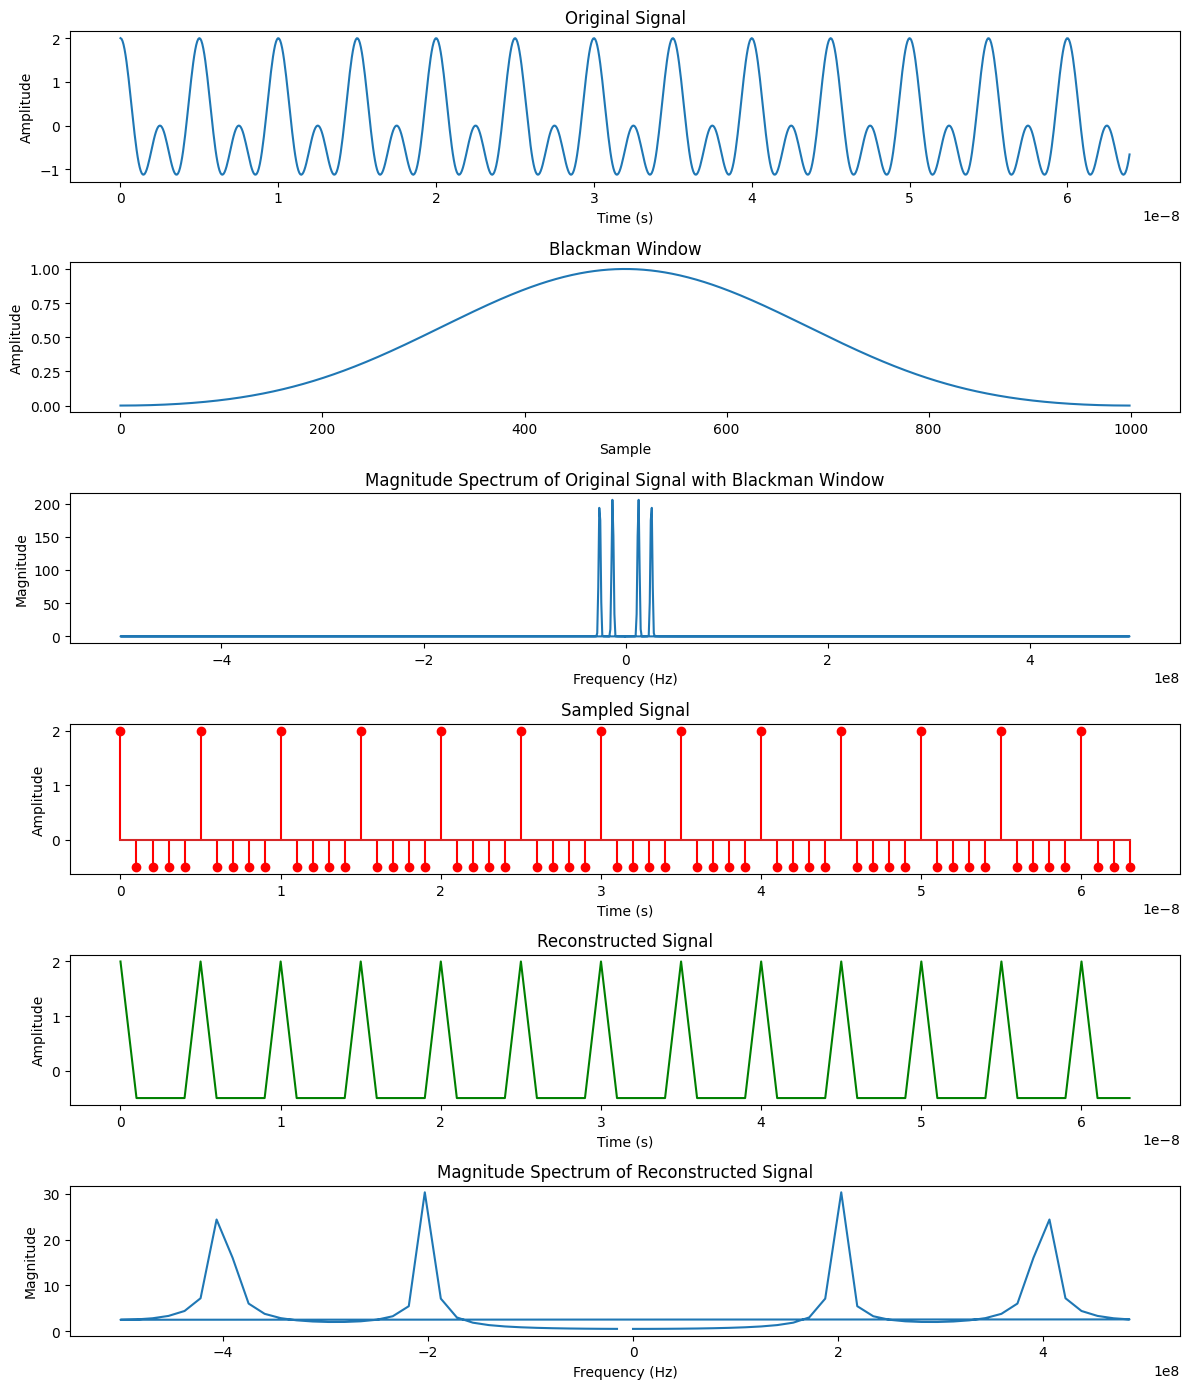

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft
from scipy.signal import blackman

# Define signal parameters
F1 = 200e6  # Frequency of the first component of the signal in Hz
F2 = 400e6  # Frequency of the second component of the signal in Hz
Fs = 1e9    # Sampling frequency in Hz
duration = 64 / Fs  # Duration of the signal in seconds

# Generate time vector for original signal
t_orig = np.linspace(0, duration, 1000, endpoint=False)

# Generate the original signal
y_orig = np.cos(2 * np.pi * F1 * t_orig) + np.cos(2 * np.pi * F2 * t_orig)

# Generate time vector for sampled signal
t_sampled = np.linspace(0, duration, 64, endpoint=False)

# Generate the sampled signal
y_sampled = np.cos(2 * np.pi * F1 * t_sampled) + np.cos(2 * np.pi * F2 * t_sampled)

# Apply Blackman window to the original signal
window = blackman(len(y_orig))
y_orig_windowed = y_orig * window

# Compute the DFT of the original signal with Blackman window
Y_orig_windowed = fft(y_orig_windowed)

# Create frequency axis for DFT
freq_orig = fftfreq(len(y_orig), 1/Fs)

# Compute the DFT of the sampled signal
Y_sampled = fft(y_sampled)

# Reconstruct the signal from the sampled signal's DFT
y_reconstructed = ifft(Y_sampled)

# Compute the DFT of the reconstructed signal
Y_reconstructed = fft(y_reconstructed)

# Plot the original signal, its DFT, the sampled signal, the reconstructed signal, and its DFT
plt.figure(figsize=(12, 14))

# Plot the original signal
plt.subplot(6, 1, 1)
plt.plot(t_orig, y_orig)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the Blackman window
plt.subplot(6, 1, 2)
plt.plot(window)
plt.title('Blackman Window')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Plot the DFT of the original signal with Blackman window
plt.subplot(6, 1, 3)
plt.plot(freq_orig, np.abs(Y_orig_windowed))
plt.title('Magnitude Spectrum of Original Signal with Blackman Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

# Plot the sampled signal
plt.subplot(6, 1, 4)
plt.stem(t_sampled, y_sampled, 'r')
plt.title('Sampled Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the reconstructed signal
plt.subplot(6, 1, 5)
plt.plot(t_sampled, y_reconstructed.real, 'g')
plt.title('Reconstructed Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the DFT of the reconstructed signal
plt.subplot(6, 1, 6)
freq_reconstructed = fftfreq(len(y_reconstructed), 1/Fs)
plt.plot(freq_reconstructed, np.abs(Y_reconstructed))
plt.title('Magnitude Spectrum of Reconstructed Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()


Transfer Function (FIR filter) in z-domain:
1 + 0.7/z + 0.4/z**2
Transfer Function (IIR filter) in z-domain:
(1 + 0.8/z)/(1 - 0.5/z)
zeros of fir:
[-0.35+0.52678269j -0.35-0.52678269j]
zeros of iir:
[-0.8]
poles of iir:
[0.5]


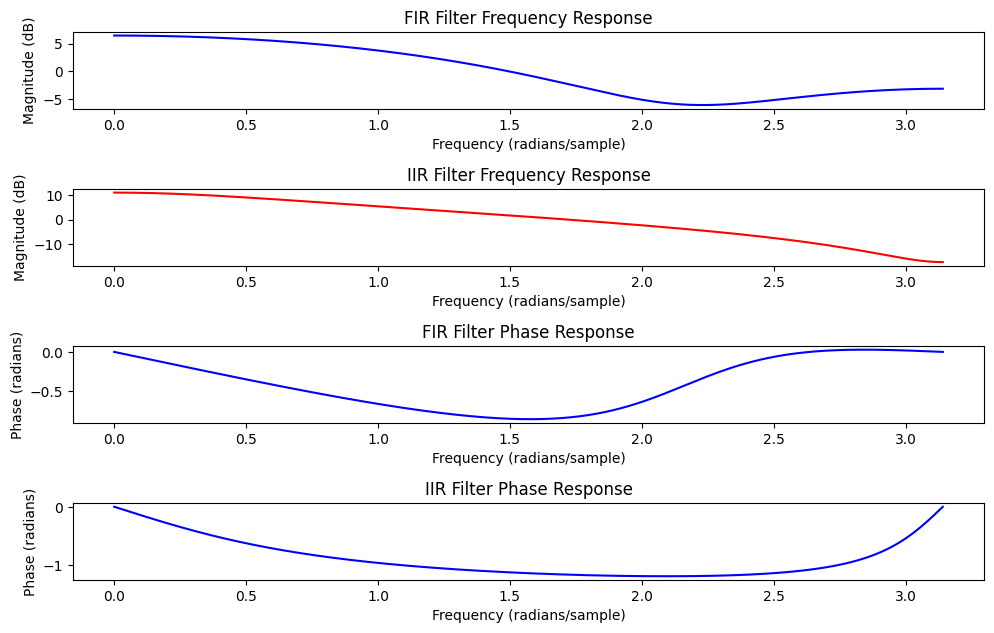

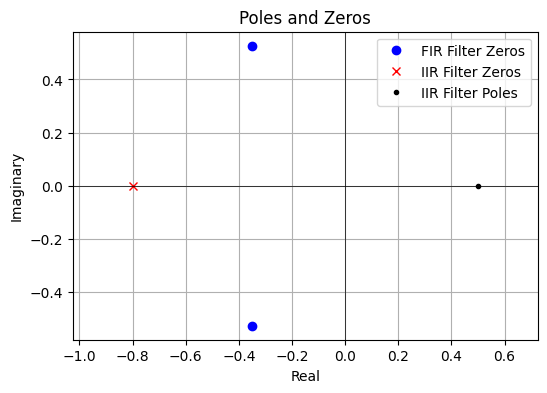

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.signal import freqz

z=sp.symbols('z')

# FIR filter coefficients, here I have taken these
b = [1, 0.7 , 0.4]

#transfer function of fir in z domain:H_FIR(z)

H_FIR_z = sum(b[i] * z**(-i) for i in range(len(b)))
print("Transfer Function (FIR filter) in z-domain:")
print(H_FIR_z)

# IIR filter coefficients
b_iir = [1, 0.8]    # Numerator coefficients
a_iir = [1, -0.5]   # Denominator coefficients

#transfer function of iir in z domain:H_IIR(z)

H_IIR_z = (sum(b_iir[i] * z**(-i) for i in range(len(b_iir)))) / (1 + sum(a_iir[i] * z**(-i) for i in range(1, len(a_iir))))
print("Transfer Function (IIR filter) in z-domain:")
print(H_IIR_z)

#computing over range of freq defined by worN=
# Frequency response of FIR filter
w_fir, h_fir = freqz(b, worN=20000)

# Frequency response of IIR filter
w_iir, h_iir = freqz(b_iir, a_iir, worN=20000)

# phase response

phase_fir = np.unwrap(np.angle(h_fir))
phase_iir = np.unwrap(np.angle(h_iir))

# Plotting FIR filter response taking this as 1st plot
plt.figure(figsize=(10, 6))
plt.subplot(4, 1, 1)
plt.plot(w_fir, 20 * np.log10(abs(h_fir)), 'b')
plt.title('FIR Filter Frequency Response')
plt.ylabel('Magnitude (dB)')
plt.xlabel('Frequency (radians/sample)')

# Plot IIR filter response
plt.subplot(4, 1, 2)
plt.plot(w_iir, 20 * np.log10(abs(h_iir)), 'r')
plt.title('IIR Filter Frequency Response')
plt.ylabel('Magnitude (dB)')
plt.xlabel('Frequency (radians/sample)')
plt.tight_layout()

# Plot phase response for FIR filter
plt.subplot(4, 1, 3)
plt.plot(w_fir, phase_fir, 'b')
plt.title('FIR Filter Phase Response')
plt.ylabel('Phase (radians)')
plt.xlabel('Frequency (radians/sample)')

# Plot phase response for IIR filter
plt.subplot(4, 1, 4)
plt.plot(w_iir, phase_iir, 'b')
plt.title('IIR Filter Phase Response')
plt.ylabel('Phase (radians)')
plt.xlabel('Frequency (radians/sample)')


# Identify poles and zeros
# FIR filter has no poles, only zeros at z=0
plt.figure(figsize=(6, 4))
plt.plot(np.real(np.roots(b)), np.imag(np.roots(b)), 'bo', label='FIR Filter Zeros')
print("zeros of fir:")
print(np.roots(b))
# IIR filter poles and zeros
plt.plot(np.real(np.roots(b_iir)), np.imag(np.roots(b_iir)), 'rx', label='IIR Filter Zeros')
plt.plot(np.real(np.roots(a_iir)), np.imag(np.roots(a_iir)), 'k.', label='IIR Filter Poles')
print("zeros of iir:")
print(np.roots(b_iir))
print("poles of iir:")
print(np.roots(a_iir))
plt.title('Poles and Zeros')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()



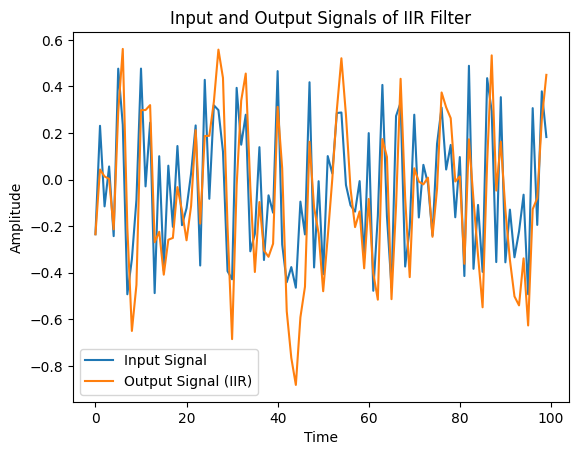

In [ ]:
from scipy.signal import lfilter

# Define IIR filter coefficients
b_iir = [1, 0.5]
a_iir = [1, -0.3]

# Apply IIR filter to the input signal
output_signal_iir = lfilter(b_iir, a_iir, input_signal)

# Plot input and output signals
plt.plot(input_signal, label='Input Signal')
plt.plot(output_signal_iir, label='Output Signal (IIR)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Input and Output Signals of IIR Filter')
plt.legend()
plt.show()


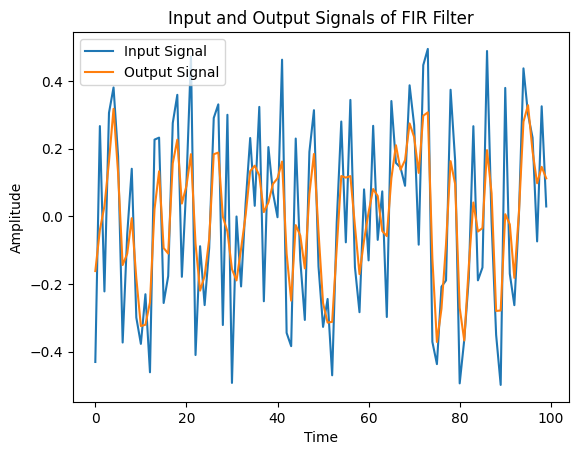

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define FIR filter coefficients
b = [0.2, 0.5, 0.3]

# Generate a bounded input signal
num_samples = 100
input_signal = np.random.rand(num_samples) - 0.5  # Bounded random signal between -0.5 and 0.5

# Apply FIR filter to the input signal
output_signal = np.convolve(input_signal, b, mode='same')

# Plot input and output signals
plt.plot(input_signal, label='Input Signal')
plt.plot(output_signal, label='Output Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Input and Output Signals of FIR Filter')
plt.legend()
plt.show()


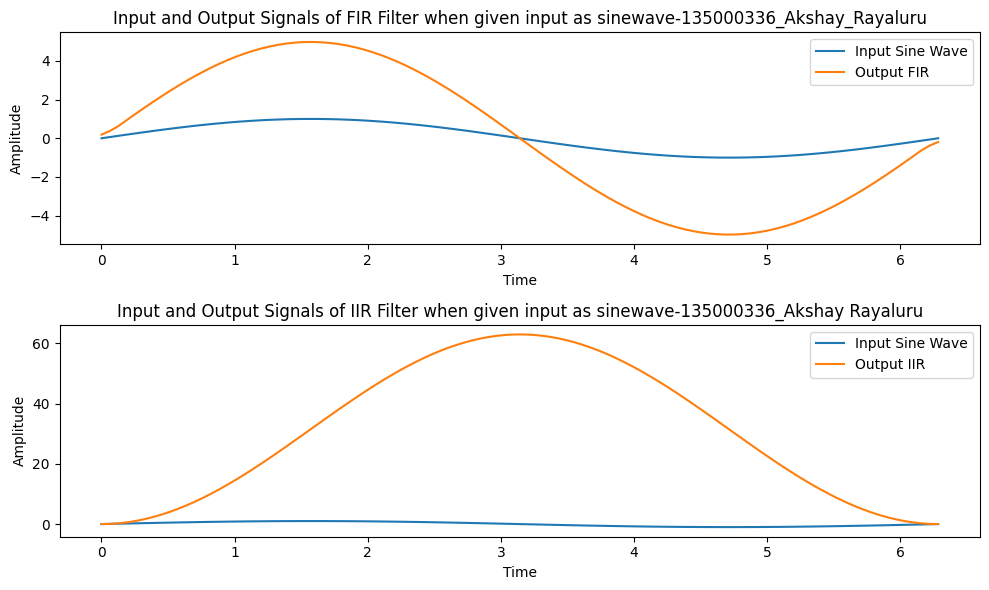

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

# Generate a sine wave as the input signal
num_samples = 100
time = np.linspace(0, 2*np.pi, num_samples)
input_signal = np.sin(time)

# Define FIR and IIR filter coefficients
b_fir = [1, 1, 1, 1, 1]
b_iir = [1, 1]
a_iir = [1, -1]

# Apply FIR filter to the input sine wave
output_signal_fir = np.convolve(input_signal, b_fir, mode='same')

# Apply IIR filter to the input sine wave
output_signal_iir = lfilter(b_iir, a_iir, input_signal)

# Plot input and output signals for FIR filter
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time, input_signal, label='Input Sine Wave')
plt.plot(time, output_signal_fir, label='Output FIR')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Input and Output Signals of FIR Filter when given input as sinewave-135000336_Akshay_Rayaluru')
plt.legend()

# Plot input and output signals for IIR filter
plt.subplot(2, 1, 2)
plt.plot(time, input_signal, label='Input Sine Wave')
plt.plot(time, output_signal_iir, label='Output IIR')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Input and Output Signals of IIR Filter when given input as sinewave-135000336_Akshay Rayaluru')
plt.legend()

plt.tight_layout()
plt.show()


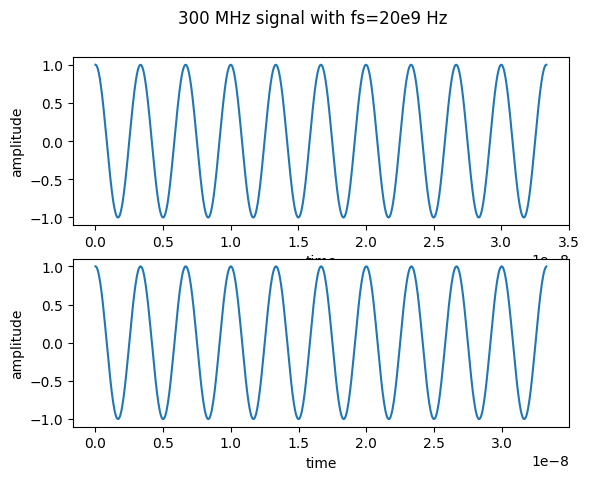

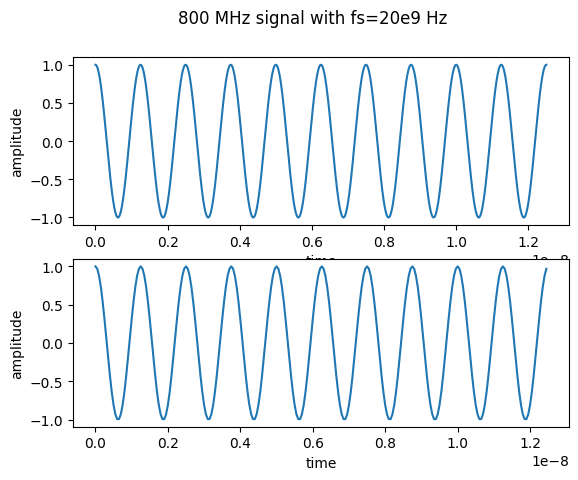

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sampling_frequency = 20e9
frequency1 = 300e6
frequency2 = 800e6
timearrayS1 = np.linspace(0, 10 * (1 / 300e6), 20000)
timearrayS2 = np.linspace(0, 10 * (1 / 800e6), 20000)
sampletime1 = np.arange(0, 10 * (1 / frequency1), (1 / sampling_frequency))
sampletime2 = np.arange(0, 10 * (1 / frequency2), (1 / sampling_frequency))
X = np.cos(2 * np.pi * frequency1 * timearrayS1)
Y = np.cos(2 * np.pi * frequency2 * timearrayS2)
S1 = np.cos(2 * np.pi * frequency1 * sampletime1)
S2 = np.cos(2 * np.pi * frequency2 * sampletime2)

fig, (cosin1, samplecosin1) = plt.subplots(2)
fig.suptitle('300 MHz signal with fs=20e9 Hz')
cosin1.plot(timearrayS1, X)
cosin1.set_xlabel('time')
cosin1.set_ylabel('amplitude')
samplecosin1.plot(sampletime1, S1)
samplecosin1.set_xlabel('time')
samplecosin1.set_ylabel('amplitude')
plt.show()

fig, (cosin2, samplecosin2) = plt.subplots(2)
fig.suptitle('800 MHz signal with fs=20e9 Hz')
cosin2.plot(timearrayS2, Y)
cosin2.set_xlabel('time')
cosin2.set_ylabel('amplitude')
samplecosin2.plot(sampletime2, S2)
samplecosin2.set_xlabel('time')
samplecosin2.set_ylabel('amplitude')
plt.show()

